In [1]:
# import all tools we need

#Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We want our plots to be appeared inside the notebook
%matplotlib inline

# Models from sickit-learn(sklearn)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

from sklearn import metrics
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv('tae.csv file new 6.0.csv')

In [3]:
df

,Language,Course instructor,Course,Semester,Class size,Class Attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [4]:
# appling cumalative summation
df["Total Course instructor"]=df["Course instructor"].cumsum().astype(float)
df

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
0,1,23,3,1,19,3,23.0
1,2,15,3,1,17,3,38.0
2,1,23,3,2,49,3,61.0
3,1,5,2,2,33,3,66.0
4,2,7,11,2,55,3,73.0
...,...,...,...,...,...,...,...
146,2,3,2,2,26,1,2008.0
147,2,10,3,2,12,1,2018.0
148,1,18,7,2,48,1,2036.0
149,2,22,1,2,51,1,2058.0


In [5]:
df.head(15)

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
0,1,23,3,1,19,3,23.0
1,2,15,3,1,17,3,38.0
2,1,23,3,2,49,3,61.0
3,1,5,2,2,33,3,66.0
4,2,7,11,2,55,3,73.0
5,2,23,3,1,20,3,96.0
6,2,9,5,2,19,3,105.0
7,2,10,3,2,27,3,115.0
8,1,22,3,1,58,3,137.0
9,2,15,3,1,20,3,152.0


In [6]:
df.T # transpose of a dataset

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
Language,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
Course instructor,23.0,15.0,23.0,5.0,7.0,23.0,9.0,10.0,22.0,15.0,...,17.0,16.0,3.0,19.0,23.0,3.0,10.0,18.0,22.0,2.0
Course,3.0,3.0,3.0,2.0,11.0,3.0,5.0,3.0,3.0,3.0,...,18.0,20.0,2.0,4.0,3.0,2.0,3.0,7.0,1.0,10.0
Semester,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Class size,19.0,17.0,49.0,33.0,55.0,20.0,19.0,27.0,58.0,20.0,...,29.0,15.0,37.0,10.0,24.0,26.0,12.0,48.0,51.0,27.0
Class Attribute,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Total Course instructor,23.0,38.0,61.0,66.0,73.0,96.0,105.0,115.0,137.0,152.0,...,1944.0,1960.0,1963.0,1982.0,2005.0,2008.0,2018.0,2036.0,2058.0,2060.0


In [7]:
df.head() # show only first 5 rows

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
0,1,23,3,1,19,3,23.0
1,2,15,3,1,17,3,38.0
2,1,23,3,2,49,3,61.0
3,1,5,2,2,33,3,66.0
4,2,7,11,2,55,3,73.0


In [8]:
df.tail() #show only last 5 rows

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
146,2,3,2,2,26,1,2008.0
147,2,10,3,2,12,1,2018.0
148,1,18,7,2,48,1,2036.0
149,2,22,1,2,51,1,2058.0
150,2,2,10,2,27,1,2060.0


In [9]:
df.shape

(151, 7)

In [10]:
# Let's find out how many of each class there
df["Language"].value_counts()

2    122
1     29
Name: Language, dtype: int64

<AxesSubplot:>

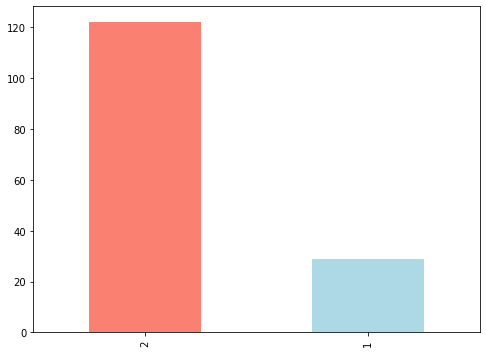

In [11]:
df["Language"].value_counts().plot(figsize=(8,6),kind="bar",color=["salmon","lightblue"])
#plt.savefig('plots/Language.png')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Language                 151 non-null    int64  
 1   Course instructor        151 non-null    int64  
 2   Course                   151 non-null    int64  
 3   Semester                 151 non-null    int64  
 4   Class size               151 non-null    int64  
 5   Class Attribute          151 non-null    int64  
 6   Total Course instructor  151 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 8.4 KB


In [13]:
# are there any missing value in this data set?

df.isna().sum()

Language                   0
Course instructor          0
Course                     0
Semester                   0
Class size                 0
Class Attribute            0
Total Course instructor    0
dtype: int64

In [14]:
df.describe()

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868,1015.920530
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327,595.292293
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,23.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000,492.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000,979.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000,1534.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000,2060.000000


# Frequency according to semester

In [15]:
df["Semester"].value_counts()

2    128
1     23
Name: Semester, dtype: int64

In [16]:
pd.crosstab(df.Language,df.Semester)

Semester,1,2
Language,,
1,9,20
2,14,108


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

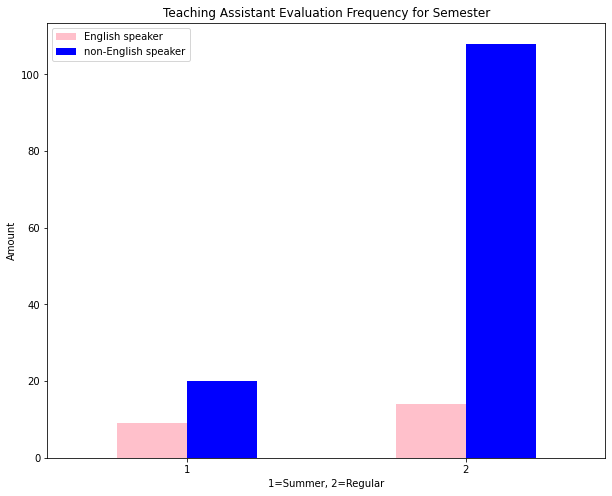

In [17]:
#create a plot of crosstab

pd.crosstab(df.Language,df.Semester).plot(figsize=(10,8),kind="bar",color=["pink","blue"])
plt.title("Teaching Assistant Evaluation Frequency for Semester")
plt.xlabel("1=Summer, 2=Regular")
plt.ylabel("Amount")
plt.legend(["English speaker","non-English speaker"])
plt.xticks(rotation=0)

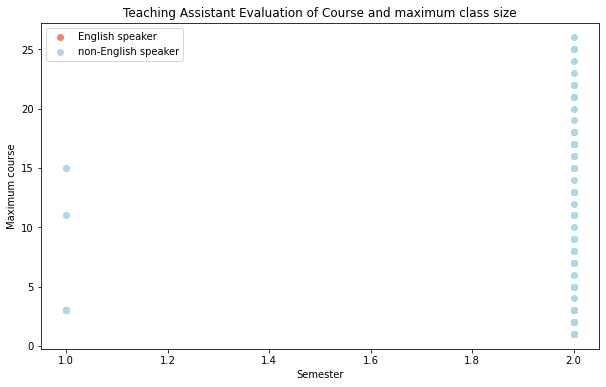

In [18]:
#create another figure

plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.Semester[df.Language==1],
            df.Course[df.Language==1],
            c="salmon")

#scatter with negative examples
plt.scatter(df.Semester[df.Language==2],
            df.Course[df.Language==2],
            c="lightblue")

#adding figure labels and titles

plt.title("Teaching Assistant Evaluation of Course and maximum class size")
plt.xlabel("Semester")
plt.ylabel("Maximum course")
plt.legend(["English speaker","non-English speaker"])

<AxesSubplot:>

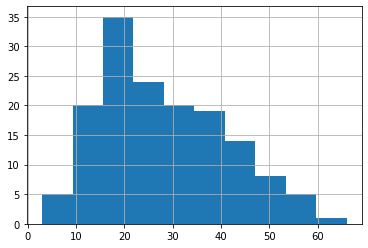

In [19]:
# checking the distribution of the class size column with histogram
df["Class size"].hist()

In [20]:
# make a correlation matrix
df.corr()

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
Language,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466,-0.031093
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095,0.076374
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103,-0.001753
Semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742,0.242359
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676,-0.170528
Class Attribute,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000,-0.332843
Total Course instructor,-0.031093,0.076374,-0.001753,0.242359,-0.170528,-0.332843,1.000000


<AxesSubplot:>

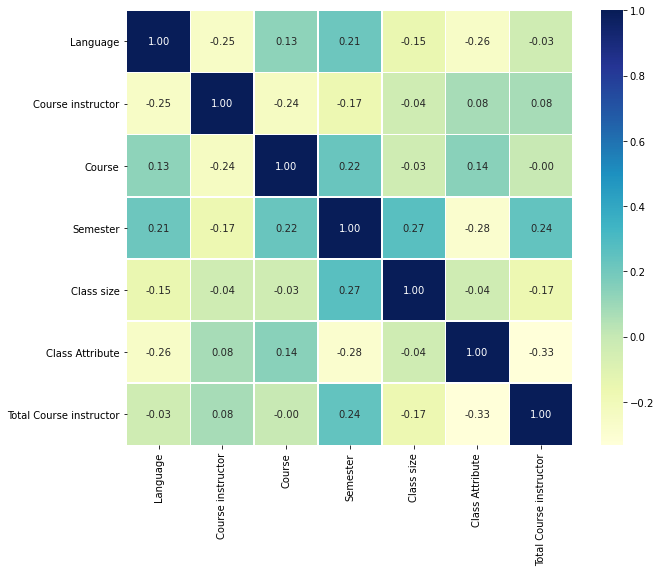

In [21]:
#  corr matrix visualisation
plt.figure(figsize=(10,8))
corr_mtx=df.corr()
sns.heatmap(corr_mtx,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [22]:
# splitting data into X and Y
X=df.drop("Language",axis=1)
Y=df["Language"]

In [23]:
numarr = Y.to_numpy()
print(numarr)

[1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 1 1 2 2 2 2 1 2 2 1 1 2 1 2 2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 2 1 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2]


In [24]:
#rplace 2 with 0, Now 1=English speaker, 0=non-English speaker
for i in range(0, 151):
    if(numarr[i] == 2):
        numarr[i] = 0

In [25]:
Y = pd.DataFrame(numarr)

In [26]:
#Y = Y.replace({'2':0}, regex = True, inplace = True)
print(Y)

     0
0    1
1    0
2    1
3    1
4    0
..  ..
146  0
147  0
148  1
149  0
150  0

[151 rows x 1 columns]


In [27]:
df.head()

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
0,1,23,3,1,19,3,23.0
1,0,15,3,1,17,3,38.0
2,1,23,3,2,49,3,61.0
3,1,5,2,2,33,3,66.0
4,0,7,11,2,55,3,73.0


In [28]:
X

,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
0,23,3,1,19,3,23.0
1,15,3,1,17,3,38.0
2,23,3,2,49,3,61.0
3,5,2,2,33,3,66.0
4,7,11,2,55,3,73.0
...,...,...,...,...,...,...
146,3,2,2,26,1,2008.0
147,10,3,2,12,1,2018.0
148,18,7,2,48,1,2036.0
149,22,1,2,51,1,2058.0


In [29]:
Y

,0
0,1
1,0
2,1
3,1
4,0
...,...
146,0
147,0
148,1
149,0


In [30]:
# splitting X and Y into train and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [31]:
X_train


,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
69,11,1,2,51,1,910.0
126,8,3,2,29,3,1700.0
57,13,3,1,10,2,752.0
146,3,2,2,26,1,2008.0
125,13,1,2,54,3,1692.0
...,...,...,...,...,...,...
137,22,1,2,42,2,1887.0
142,16,20,2,15,1,1960.0
8,22,3,1,58,3,137.0
129,18,12,2,16,2,1760.0


In [32]:
X_test.shape

(46, 6)

In [33]:
X_train.shape

(105, 6)

In [34]:
Y_test.shape

(46, 1)

In [35]:
Y_train.shape

(105, 1)

In [36]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluates give machine learning models.
    models: a dictionary of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data(no labels)
    Y_train : training labels
    Y_test : testing labels
    """
    
    # set random seed
    np.random.seed(42) # random.seed() here generates a random number within 42 so that the model doesn't later flactuate so
    
    #  make a empty dictionary to keep model scores
    model_scores = {}
    
    # loop throuth models
    for name ,model in models.items():
        # fit the model to the data
        
        model.fit(X_train,Y_train)
        
        #evaluation the model and append its score to model_score
        model_scores[name] = model.score(X_test , Y_test)
    return model_scores
    
    

In [37]:
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-36-a1133ae47593>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,Y_train)
<ipython-input-36-a

{'Logistic Regression': 0.782608695652174,
 'KNN': 0.7391304347826086,
 'Random Forest': 0.8260869565217391}

In [38]:
df # deop() doesn't change the original dataframe

,Language,Course instructor,Course,Semester,Class size,Class Attribute,Total Course instructor
0,1,23,3,1,19,3,23.0
1,0,15,3,1,17,3,38.0
2,1,23,3,2,49,3,61.0
3,1,5,2,2,33,3,66.0
4,0,7,11,2,55,3,73.0
...,...,...,...,...,...,...,...
146,0,3,2,2,26,1,2008.0
147,0,10,3,2,12,1,2018.0
148,1,18,7,2,48,1,2036.0
149,0,22,1,2,51,1,2058.0


# Logistic Regresson

In [39]:
logisticModel = LogisticRegression()

**train the Model**

In [40]:
logisticModel.fit(X_train, Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**let the model predict on test data**

In [41]:
predictions = logisticModel.predict(X_test)

In [42]:
accuracy = logisticModel.score(X_test, Y_test)

In [43]:
print("Accuracy = {}".format(accuracy))

Accuracy = 0.782608695652174


**Confusion Matrix**

In [44]:
from sklearn import metrics

In [45]:
def plotConfusionMatrix(cm, accuracy):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15)

In [46]:
cm = metrics.confusion_matrix(Y_test, predictions)

In [47]:
X_test.count()

Course instructor          46
Course                     46
Semester                   46
Class size                 46
Class Attribute            46
Total Course instructor    46
dtype: int64

In [48]:
#1 - 8
#2 - 38 

In [49]:
print(cm)

[[36  5]
 [ 5  0]]


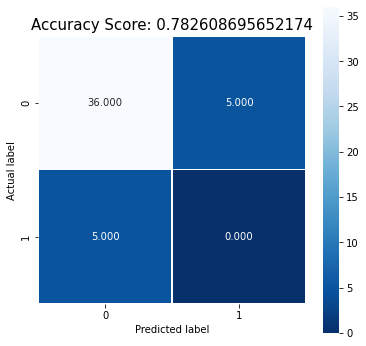

In [50]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

**Accuracy, Precision and  Recall**

In [51]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())
print("Precision = {}\nRecall = {}".format(prec,rec))
print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.782608695652174
Precision = [0.8780487804878049, 0.0]
Recall = [0.8780487804878049, 0.0]
Avg Precision = 0.43902439024390244
Avg Recall = 0.43902439024390244


**ROC Curve Logistic Regression**

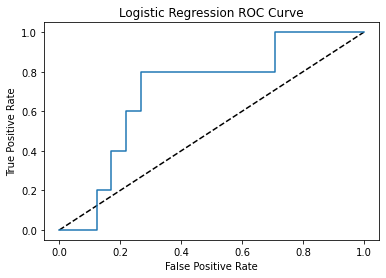

In [52]:

y_pred_prob = logisticModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

#print("Y = {}\t df{}".format(Y_test, df['Language']))

# K Nearnest Neighber

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train, Y_train)

<ipython-input-54-b601c265607f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [55]:
predictions = knn.predict(X_test)

In [56]:
accuracy = knn.score(X_test, Y_test)

In [57]:
print("Accuracy = {}".format(accuracy))

Accuracy = 0.7391304347826086


In [58]:
cm = metrics.confusion_matrix(Y_test, predictions)

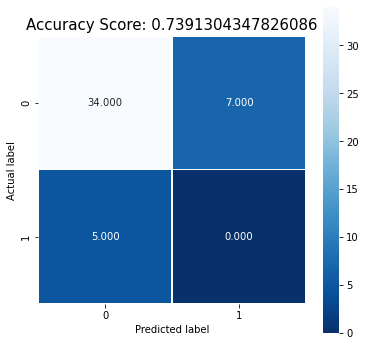

In [59]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [60]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.7391304347826086
Avg Precision = 0.4358974358974359
Avg Recall = 0.4146341463414634


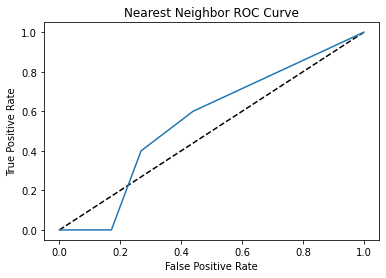

In [61]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='K Nearest Neighbor')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nearest Neighbor ROC Curve')
plt.show();

# Random Forest

In [62]:
randomForest = RandomForestClassifier()

In [63]:
randomForest.fit(X_train, Y_train)

<ipython-input-63-45f5c7b66437>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train, Y_train)


RandomForestClassifier()

In [64]:
predictions = randomForest.predict(X_test)

In [65]:
accuracy = randomForest.score(X_test, Y_test)

In [66]:
print("Accuracy = ", accuracy)

Accuracy =  0.8478260869565217


In [67]:
cm = metrics.confusion_matrix(Y_test, predictions)

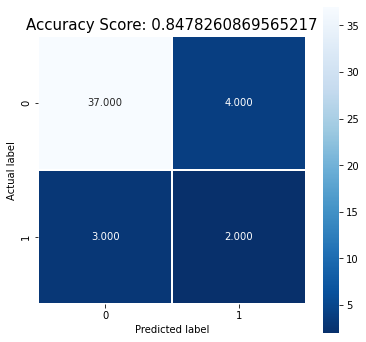

In [68]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [69]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.8478260869565217
Avg Precision = 0.6291666666666667
Avg Recall = 0.651219512195122


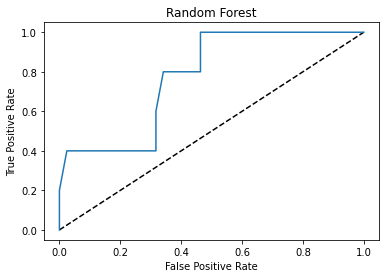

In [70]:
y_pred_prob = randomForest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.show();

# Decision Tree

In [71]:
dtree = tree.DecisionTreeClassifier()

In [72]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [73]:
predictions = dtree.predict(X_test)

In [74]:
accuracy = dtree.score(X_test, Y_test)

In [75]:
print("Accuracy = ", accuracy)

Accuracy =  0.7608695652173914


In [76]:
cm = metrics.confusion_matrix(Y_test, predictions)

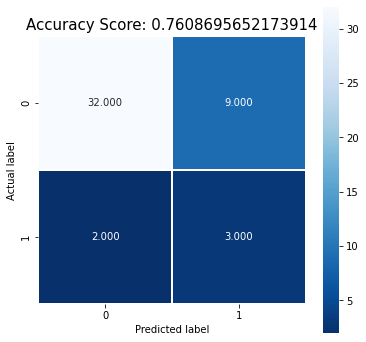

In [77]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [78]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.7608695652173914
Avg Precision = 0.5955882352941176
Avg Recall = 0.6902439024390243


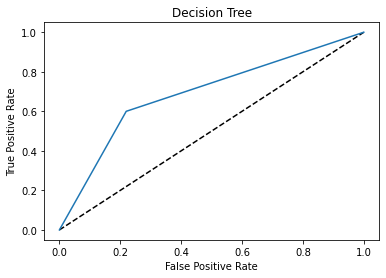

In [79]:
y_pred_prob = dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.show();

# Support Vectore Machine

In [80]:
#svm_model = svm.SVC(decision_function_shape='ovo', gamma = 0)
svm_model = svm.SVC(kernel='linear', C=2, decision_function_shape='ovo', probability=True)

In [81]:
svm_model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=2, decision_function_shape='ovo', kernel='linear', probability=True)

In [82]:
predictions = svm_model.predict(X_test)

In [83]:
accuracy = svm_model.score(X_test, Y_test)

In [84]:
print("Accuracy = ", accuracy)

Accuracy =  0.8043478260869565


In [85]:
cm = metrics.confusion_matrix(Y_test, predictions)

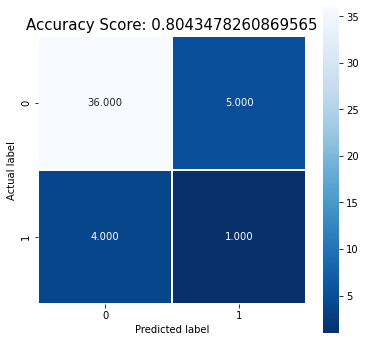

In [86]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [87]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.8043478260869565
Avg Precision = 0.5333333333333333
Avg Recall = 0.5390243902439025


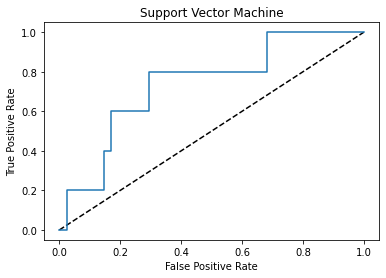

In [88]:
y_pred_prob = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine')
plt.show();

# Naive Bayes

In [89]:
gnb = GaussianNB()

In [90]:
gnb.fit(X_train, Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [91]:
predictions = gnb.predict(X_test)

In [92]:
accuracy = gnb.score(X_test, Y_test)

In [93]:
print("Accuracy = ", accuracy)

Accuracy =  0.8260869565217391


In [94]:
cm = metrics.confusion_matrix(Y_test, predictions)

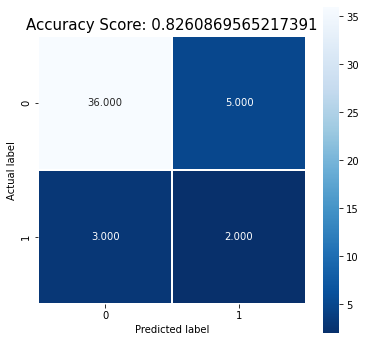

In [95]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [96]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.8260869565217391
Avg Precision = 0.6043956043956045
Avg Recall = 0.6390243902439025


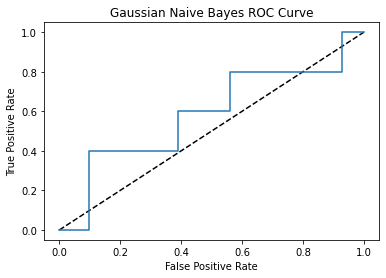

In [97]:

y_pred_prob = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve')
plt.show();

#print("Y = {}\t df{}".format(Y_test, df['Language']))